# CGNN Example on the Flow Cytometry dataset dataset 
Sachs, K., Perez, O., Pe’er, D., Lauffenburger, D. A., & Nolan, G. P. (2005). Causal protein-signaling networks derived from multiparameter single-cell data. Science, 308(5721), 523-529

In [1]:
#Import libraries
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NJOBS=16
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Detecting CUDA device(s) : (0, 1, 2, 3)
numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.


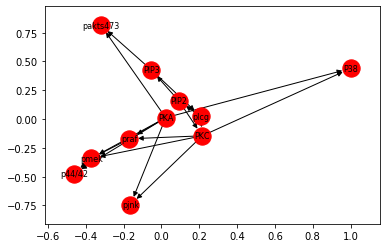

,praf,pmek,plcg,PIP2,PIP3,p44/42,pakts473,PKA,PKC,P38,pjnk
0,26.4,13.2,8.82,18.30,58.80,6.61,17.0,414.0,17.00,44.9,40.0
1,35.9,16.5,12.30,16.80,8.13,18.60,32.5,352.0,3.37,16.5,61.5
2,59.4,44.1,14.60,10.20,13.00,14.90,32.5,403.0,11.40,31.9,19.5
3,73.0,82.8,23.10,13.50,1.29,5.83,11.8,528.0,13.70,28.6,23.1
4,33.7,19.8,5.19,9.73,24.80,21.10,46.1,305.0,4.66,25.7,81.3


In [2]:
# Load data and graph solution
data, solution = cdt.data.load_dataset('sachs')
nx.draw_networkx(solution, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()
data.head()

--- Execution time : 575. seconds ---



The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.


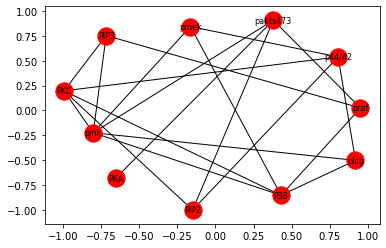

,0,1,2
0,praf,PIP3,3.648269e-07
1,praf,pakts473,7.585697e-05
2,praf,P38,1.438171e-07
3,PIP3,PKC,5.694801e-07
4,PIP3,pjnk,6.234893e-06
5,pakts473,PIP2,1.649825e-07
6,pakts473,PKA,3.306730e-05
7,pakts473,pjnk,1.564420e-05
8,P38,pmek,1.251111e-07
9,P38,plcg,1.025868e-07


In [3]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN

Fsgnn = FSGNN(train_epochs=1000, test_epochs=500, l1=0.1, batch_size=1000)

start_time = time.time()
ugraph = Fsgnn.predict(data, threshold=1e-7)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')))

--- Execution time : 1309 seconds ---


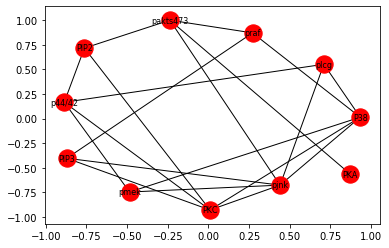

,Cause,Effect,Score
0,PIP3,praf,0.082269
1,PIP3,PKC,0.175768
2,PIP3,pjnk,0.060107
3,praf,P38,0.250264
4,pakts473,praf,0.166273
5,pakts473,PIP2,0.010147
6,pakts473,pjnk,0.109217
7,P38,plcg,0.117087
8,PKC,P38,0.080231
9,pjnk,plcg,0.022892


In [4]:
# Pairwise orientation of the edges of the graph
from cdt.causality.pairwise import GNN
from cdt.utils.graph import dagify_min_edge
start_time = time.time()

gnn = GNN(nruns=32, train_epochs=1000, test_epochs=500, batch_size=1000)
ograph = dagify_min_edge(gnn.orient_graph(data, ugraph))
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ograph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

--- Execution time : 1080 seconds ---


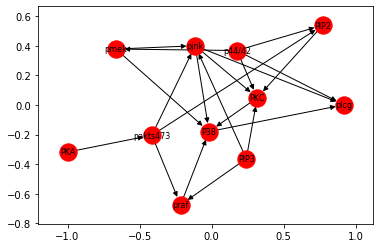

,Cause,Effect,Score
0,PIP3,praf,0.082269
1,PIP3,PKC,0.175768
2,PIP3,pjnk,0.060107
3,praf,P38,0.250264
4,pakts473,praf,0.166273
5,pakts473,PIP2,0.010147
6,pakts473,pjnk,0.109217
7,P38,plcg,0.117087
8,PKC,P38,0.080231
9,pjnk,plcg,0.022892


In [5]:
from cdt.causality.graph import CGNN
Cgnn = CGNN(nruns=16, train_epochs=2000, test_epochs=1000, batch_size=1000)
start_time = time.time()
dgraph = Cgnn.orient_directed_graph(data, ograph)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])